# Movie Genre Analysis For Proposed Microsoft Studio

<img src="./images/vecteezy_microsoft-logo-on-transparent-background_14018578.jpg" alt="Microsoft Logo" width="300">

## 1.0) Project Overview

[Microsoft Corporation](https://www.microsoft.com/en-us/) is a multinational computer technology corporation that develops, licenses, and sells computer software, consumer electronics, and personal computers. It is headquartered in Redmond, Washington. The company was founded on April 4, 1975, by Bill Gates and Paul Allen in Albuquerque, New Mexico.

This project analyses movie genre ratings and gross earnings to offer Microsoft Corporation insights about movies for the proposed new original movie studio.

## 1.1) Business Problem

<img src="./images/Clapper_board_Clapper-board.jpg" alt="Movie" height="200">

Microsoft plans to venture in original video content creation. The head of Microsoft's proposed movie studio wants to know what genres of films are currently performing best at the box office. They need this information so that they can focus on creating films that are likely to succeed.

## 1.2) Objectives

* Identify the best performing movie genres at the box office.
* Generate recommendations for the types of films that Microsoft's proposed movie studio should create.

## 1.3) Metric of Success

The project will be considered successful if:
* I accurately make predictions about which movie genres are doing the best at the box office
* I generate useful recommendations about types of films the studio should create

## 1.4) Data Sources

The data sources for this data science project will be:

* The bom.movie_gross.csv dataset, which contains information about the gross earnings of movies from [Box Office Mojo](https://www.boxofficemojo.com/).
* The title.basics.csv dataset, which contains information about the basic details of movies from [IMDB](https://www.imdb.com/).
* The title.ratings.csv dataset, which contains information about the ratings of movies from [IMDB](https://www.imdb.com/).


## 1.5) Data Relevance and Validation

The data available is relevant for the intended analysis. More information can be found here:
*  [IMDB](https://www.imdb.com/)
*  [Box Office Mojo](https://www.boxofficemojo.com/)

## 2.0) Reading and Understanding the Data

In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', None)

In [2]:
# reading the data
movie_gross = pd.read_csv("./data/bom.movie_gross.csv")
movie_info = pd.read_csv("./data/title.basics.csv")
movie_ratings = pd.read_csv("./data/title.ratings.csv")

## 2.1) Understanding the Data

In [3]:
movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [4]:
movie_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [5]:
movie_gross["year"].value_counts().sort_index()

2010    328
2011    399
2012    400
2013    350
2014    395
2015    450
2016    436
2017    321
2018    308
Name: year, dtype: int64

**Movies gross earnings** dataset has 3387 records and 5 columns. The data shows different movie titles, studio they were recorded from, revenue (domestic and foreign) and year. The data runs from 2010 through 2018.

In [6]:
movie_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [7]:
movie_info.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [8]:
# Comparing movie_info primary_title and original_title
movie_info[movie_info['primary_title'] != movie_info['original_title']][['primary_title', 'original_title']]

,primary_title,original_title
1,One Day Before the Rainy Season,Ashad Ka Ek Din
4,The Wandering Soap Opera,La Telenovela Errante
11,So Much for Justice!,Oda az igazság
13,Children of the Green Dragon,A zöld sárkány gyermekei
15,The Tragedy of Man,Az ember tragédiája
...,...,...
146026,Journey of the Sky Goddess,Kibaiyanse! Watashi
146028,Lupin the Third: Fujiko Mine's Lie,Lupin the IIIrd: Mine Fujiko no Uso
146037,Big Three Dragons,Da San Yuan
146121,A Cherry Tale,Kirsebæreventyret


In [9]:
# understanding title column of movie_gross
movie_gross[movie_gross["title"]=="O Ensaio"]

,title,studio,domestic_gross,foreign_gross,year


**Movies information** dataset has 146144 records and 6 columns. The data shows different movie primary title in english, original titles in origninal language, year the movie started airing, movie run time in minutes and genres the movie belongs to.

In [10]:
movie_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [11]:
movie_ratings.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


**Movies ratings** dataset has 73856 records and 36 columns. The data shows different movie identifiers, movie weighted average user rating on a scale of 1 to 10, and number of votes.

## 2.2) Preparing the Data

### 2.2.1) Data Cleaning

movie_gross foreign is formated as sting intead of a float

In [12]:
# A function to identify non numeric rows in "foreign_gross"
def non_numeric_rows(data):
  non_numeric_df = movie_gross[pd.to_numeric(data, errors='coerce').isna()]
  return non_numeric_df

In [13]:
non_numeric_foreign_gross = non_numeric_rows(movie_gross["foreign_gross"])
non_numeric_foreign_gross.sample(10)

,title,studio,domestic_gross,foreign_gross,year
709,Tyrannosaur,Strand,22300.0,NaN,2011
2624,Oasis: Supersonic,A24,243000.0,NaN,2016
2669,Phantom Detective,CJ,67100.0,NaN,2016
3365,The Apparition (2018),MBox,28300.0,NaN,2018
3301,Fireworks (2018),GK,525000.0,NaN,2018
2688,In Order of Disappearance,Magn.,50300.0,NaN,2016
3267,You Were Never Really Here,Amazon,2500000.0,NaN,2018
3256,Ya Veremos,PNT,4200000.0,NaN,2018
2173,The Connection,Drft.,191000.0,NaN,2015
1398,Himmatwala,UTV,271000.0,NaN,2013


In [14]:
# filling missing values with 0
movie_gross["foreign_gross"] = movie_gross["foreign_gross"].fillna(0)

# Removing characters 
movie_gross["foreign_gross"].replace(",", "", inplace=True, regex=True)

# changinging datatype to float
movie_gross["foreign_gross"] = movie_gross["foreign_gross"].astype(float)

# checking movie_gross info
movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   3387 non-null   float64
 4   year            3387 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 132.4+ KB


In [15]:
# A function find proportion of missing value
def missing_values(data):
    # identify the total missing values per column
    # sort in order
    data = data.reset_index()
    miss = data.isnull().sum().sort_values(ascending = False)

    # calculate percentage of the missing values
    percentage_miss = (data.isnull().sum() / len(data)).sort_values(ascending = False)

    # store in a dataframe
    missing = pd.DataFrame({"Missing Values": miss, "Percentage": percentage_miss}).reset_index()

    # remove values that are missing
    missing.drop(missing[missing["Percentage"] == 0].index, inplace = True)

    return missing

In [16]:
missing_values(movie_gross)

,index,Missing Values,Percentage
0,domestic_gross,28,0.008267
1,studio,5,0.001476


In [17]:
# domestic_gross has 28 missing values. I will fill these with 0
movie_gross["domestic_gross"] = movie_gross["domestic_gross"].fillna(0)
# studio has 5 missing values. I drop these.
movie_gross.dropna(inplace=True)
missing_values(movie_gross)

,index,Missing Values,Percentage


In [18]:
missing_values(movie_info)

,index,Missing Values,Percentage
0,runtime_minutes,31739,0.217176
1,genres,5408,0.037005
2,original_title,21,0.000144


In [19]:
# there is no meaniful analysis that can be done on missing records so I drop them
movie_info.dropna(inplace=True)
missing_values(movie_info)

,index,Missing Values,Percentage


In [20]:
missing_values(movie_ratings)

,index,Missing Values,Percentage


movie_gross title column has movie names with the year in brackets which is a different format to primary_title in movie_info.

In [21]:
# Removing (year) from movies
movie_gross['title'] = movie_gross['title'].str.replace(r' \(\d{4}\)', '')
movie_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000.0,2010
1,Alice in Wonderland,BV,334200000.0,691300000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010
3,Inception,WB,292600000.0,535700000.0,2010
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010


In [22]:
# separating genres into separate columns

movie_genre = movie_info['genres'].str.split(',')

max_genres = movie_genre.apply(len).max()

genre_columns = [f'genre{i}' for i in range(1, max_genres + 1)]

genre_df = movie_genre.apply(lambda x: pd.Series(x + [None] * (max_genres - len(x))))

genre_df.columns = genre_columns

movie_info = pd.concat([movie_info, genre_df], axis=1)

movie_info


,tconst,primary_title,original_title,start_year,runtime_minutes,genres,genre1,genre2,genre3
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",Action,Crime,Drama
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",Biography,Drama,None
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,Drama,None,None
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",Comedy,Drama,Fantasy
5,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy,Comedy,None,None
...,...,...,...,...,...,...,...,...,...
146134,tt9916160,Drømmeland,Drømmeland,2019,72.0,Documentary,Documentary,None,None
146135,tt9916170,The Rehearsal,O Ensaio,2019,51.0,Drama,Drama,None,None
146136,tt9916186,Illenau - die Geschichte einer ehemaligen Heil...,Illenau - die Geschichte einer ehemaligen Heil...,2017,84.0,Documentary,Documentary,None,None
146137,tt9916190,Safeguard,Safeguard,2019,90.0,"Drama,Thriller",Drama,Thriller,None


In [23]:
movie_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112232 entries, 0 to 146139
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           112232 non-null  object 
 1   primary_title    112232 non-null  object 
 2   original_title   112232 non-null  object 
 3   start_year       112232 non-null  int64  
 4   runtime_minutes  112232 non-null  float64
 5   genres           112232 non-null  object 
 6   genre1           112232 non-null  object 
 7   genre2           54125 non-null   object 
 8   genre3           27374 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 8.6+ MB


### 2.2.2) Merging Datasets

In [24]:
# Merging movie_info and movie_ratings on "tconst"
movie_info_ratings_df  = pd.merge(movie_info, 
                              movie_ratings, 
                              on="tconst",
                              how="inner")

In [25]:
movie_info_ratings_df.head(2)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,genre1,genre2,genre3,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",Action,Crime,Drama,7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",Biography,Drama,None,7.2,43


In [26]:
movie_info_ratings_df.shape

(65720, 11)

In [27]:
movie_gross.shape

(3382, 5)

In [28]:
# Merging movie_info_ratings_df and movie_gross left_on "original_title" and right_on "title"
microsoft_studio_df  = pd.merge(movie_info_ratings_df, 
                              movie_gross, 
                              left_on=["primary_title","start_year"],
                              right_on=["title","year"],
                              how="inner")

In [29]:
microsoft_studio_df = microsoft_studio_df.drop(["year", "title"], axis=1)

In [30]:
microsoft_studio_df.head(2)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,genre1,genre2,genre3,averagerating,numvotes,studio,domestic_gross,foreign_gross
0,tt0315642,Wazir,Wazir,2016,103.0,"Action,Crime,Drama",Action,Crime,Drama,7.1,15378,Relbig.,1100000.0,0.0
1,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",Adventure,Drama,Romance,6.1,37886,IFC,744000.0,8000000.0


In [31]:
microsoft_studio_df.shape

(2026, 14)

In [32]:
microsoft_studio_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2026 entries, 0 to 2025
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           2026 non-null   object 
 1   primary_title    2026 non-null   object 
 2   original_title   2026 non-null   object 
 3   start_year       2026 non-null   int64  
 4   runtime_minutes  2026 non-null   float64
 5   genres           2026 non-null   object 
 6   genre1           2026 non-null   object 
 7   genre2           1774 non-null   object 
 8   genre3           1229 non-null   object 
 9   averagerating    2026 non-null   float64
 10  numvotes         2026 non-null   int64  
 11  studio           2026 non-null   object 
 12  domestic_gross   2026 non-null   float64
 13  foreign_gross    2026 non-null   float64
dtypes: float64(4), int64(2), object(8)
memory usage: 237.4+ KB


In [33]:
# checking the size difference between merged dataset and revenue dataset
missing_movies = movie_gross[~movie_gross["title"].isin(microsoft_studio_df["primary_title"])]
missing_movies

,title,studio,domestic_gross,foreign_gross,year
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010
13,Tron Legacy,BV,172100000.0,228000000.0,2010
28,Knight & Day,Fox,76400000.0,185500000.0,2010
31,Percy Jackson & The Olympians: The Lightning T...,Fox,88800000.0,137700000.0,2010
38,Red,Sum.,90400000.0,108600000.0,2010
...,...,...,...,...,...
3380,Furious (Legend of Kolovrat),CARUSEL,10000.0,0.0,2018
3381,Beauty and the Dogs,Osci.,8900.0,0.0,2018
3383,Edward II (2018 re-release),FM,4800.0,0.0,2018
3384,El Pacto,Sony,2500.0,0.0,2018


In [34]:
missing_movies[missing_movies["title"].str.contains(r'\(.*\)', regex=True)]

,title,studio,domestic_gross,foreign_gross,year
63,Aftershock (Tangshan Dadizhen),CL,63000.0,100200000.0,2010
79,If You Are the One 2 (Fei Cheng Wu Rao II),CL,427000.0,75600000.0,2010
150,A Prophet (Un prophète),SPC,2100000.0,15800000.0,2010
237,The Salvation Poem (Poema de Salvacion),CZ,915000.0,183000.0,2010
247,Hideaway (Le Refuge),Strand,34500.0,837000.0,2010
...,...,...,...,...,...
3297,The Big Lebowski (20th Anniversary),Fathom,583000.0,0.0,2018
3306,Vertigo (60th Anniversary),Fathom,394000.0,0.0,2018
3317,Maquia: When the Promised Flower Blooms (Subti...,Elev.,186000.0,0.0,2018
3380,Furious (Legend of Kolovrat),CARUSEL,10000.0,0.0,2018


### 2.2.3) Feature Engineering

Addding `total_revenue` column to analyze revenue

In [35]:
microsoft_studio_df["total_revenue"] = microsoft_studio_df["domestic_gross"] + \
microsoft_studio_df["foreign_gross"]
microsoft_studio_df.head(2)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,genre1,genre2,genre3,averagerating,numvotes,studio,domestic_gross,foreign_gross,total_revenue
0,tt0315642,Wazir,Wazir,2016,103.0,"Action,Crime,Drama",Action,Crime,Drama,7.1,15378,Relbig.,1100000.0,0.0,1100000.0
1,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",Adventure,Drama,Romance,6.1,37886,IFC,744000.0,8000000.0,8744000.0


## 2.3) Analyis

### 2.3.1) Exploratory Data Analysis

In [36]:
# viewing summary statistics
microsoft_studio_df.describe()

,start_year,runtime_minutes,averagerating,numvotes,domestic_gross,foreign_gross,total_revenue
count,2026.000000,2026.000000,2026.000000,2.026000e+03,2.026000e+03,2.026000e+03,2.026000e+03
mean,2014.000987,110.691510,6.412389,9.037440e+04,4.213510e+07,6.485193e+07,1.069870e+08
std,2.501160,19.844235,1.000691,1.469214e+05,7.652229e+07,1.336616e+08,2.008038e+08
min,2010.000000,25.000000,1.600000,5.000000e+00,0.000000e+00,0.000000e+00,3.000000e+02
25%,2012.000000,96.000000,5.800000,7.555500e+03,5.392500e+05,0.000000e+00,1.300000e+06
50%,2014.000000,107.000000,6.500000,3.557800e+04,1.025000e+07,8.150000e+06,2.490000e+07
75%,2016.000000,122.000000,7.100000,1.052382e+05,5.057500e+07,5.820000e+07,1.098232e+08
max,2018.000000,189.000000,8.800000,1.841066e+06,7.001000e+08,9.464000e+08,1.405400e+09


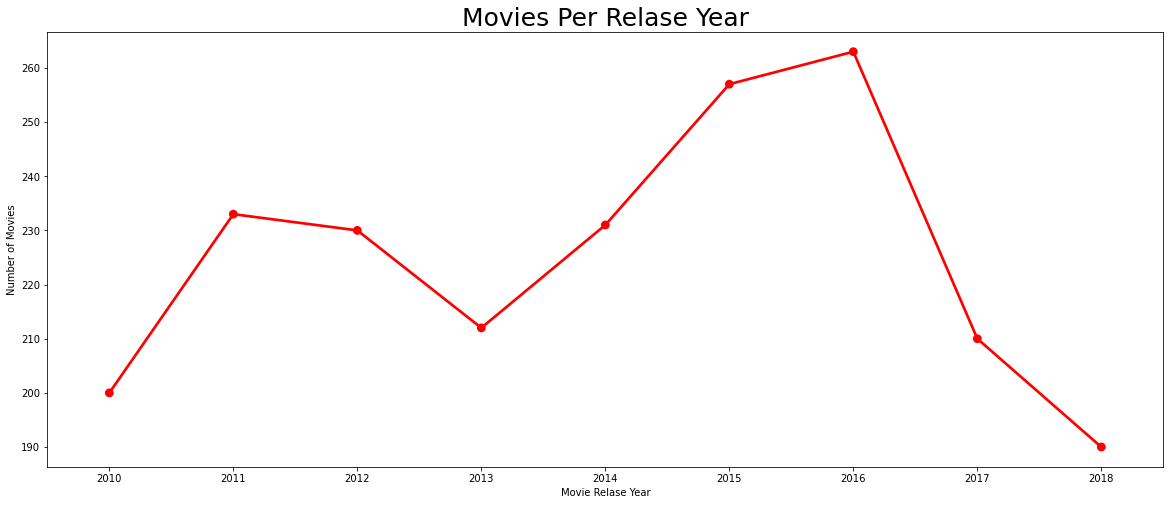

In [38]:
# start_year value counts line graph
year = microsoft_studio_df["start_year"].value_counts()
plt.figure(figsize=(20,8))
sns.pointplot(x=year.index, y=year.values, color='red')
plt.xlabel("Movie Relase Year")
plt.ylabel("Number of Movies")
plt.title("Movies Per Relase Year", size=25);

Observation: Most movies in the dataset were relased in 2016

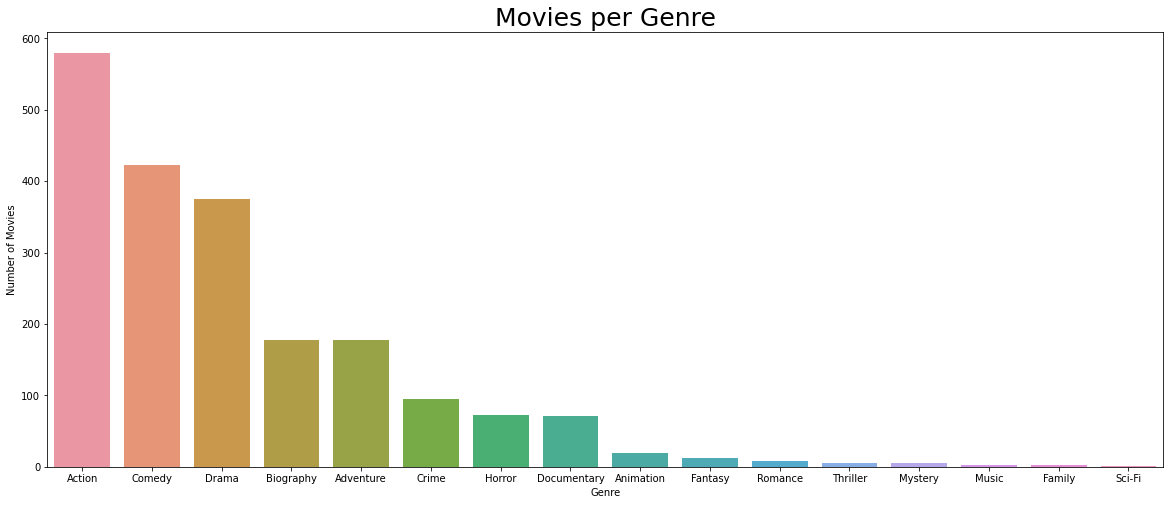

In [40]:
# genre1 value counts bar plot
genre = microsoft_studio_df["genre1"].value_counts()
plt.figure(figsize=(20,8))
sns.barplot(x=genre.index, y=genre.values)
plt.xlabel("Genre")
plt.ylabel("Number of Movies")
plt.title("Movies per Genre", size=25);

Observation: Most movies in the dataset are Action movies

### 2.3.2) Genre Analysis

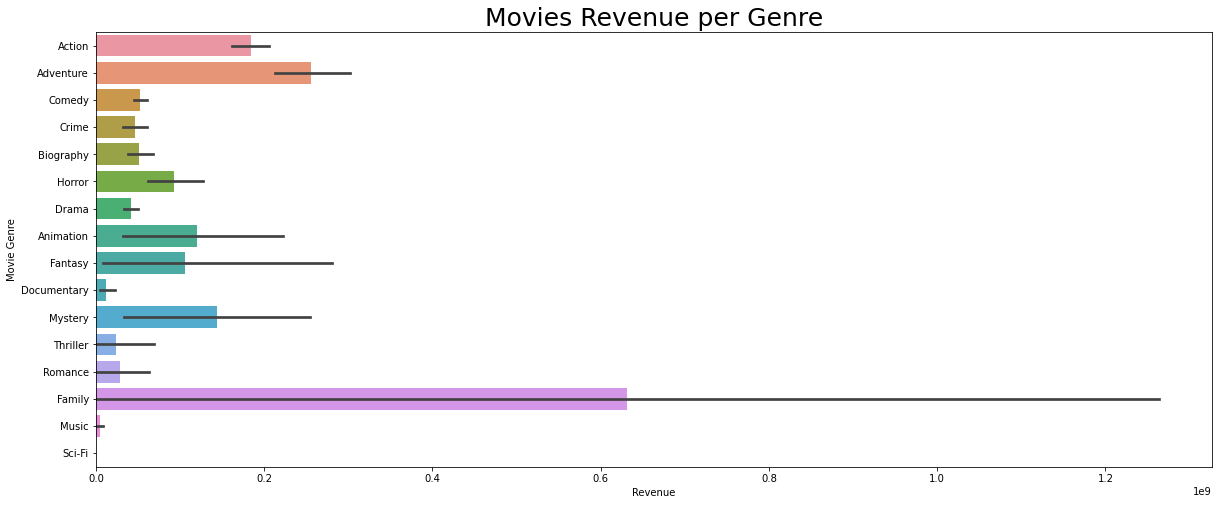

In [42]:
# genre1 vs total_revenue
plt.figure(figsize=(20,8))
sns.barplot(y=microsoft_studio_df["genre1"],
            x=microsoft_studio_df["total_revenue"],
            orient="h")
plt.xlabel("Revenue")
plt.ylabel("Movie Genre")
plt.title("Movies Revenue per Genre", size=25);

Observation: Family genre earned highest revenue

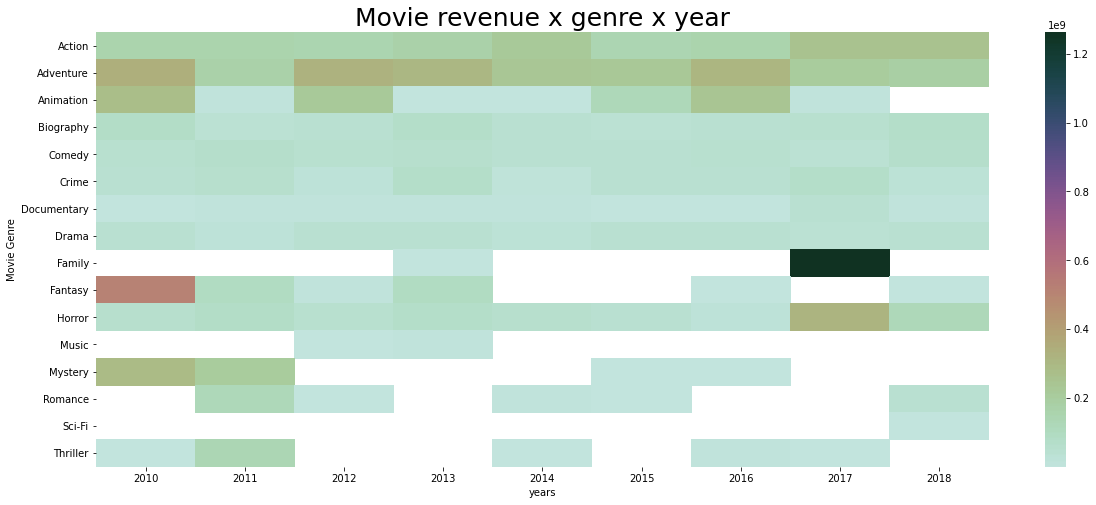

In [44]:
# genre1 vs total_revenue vs start_year
genre_year =   microsoft_studio_df.groupby(['genre1',
               'start_year']).mean().sort_index()
df_year_gross = genre_year.pivot_table(index=['genre1'], 
                columns=['start_year'], values='total_revenue',
                aggfunc=np.mean)
cmap = sns.cubehelix_palette(start=1.5, rot=1.5, as_cmap=True)
plt.figure(figsize=(20,8))
sns.heatmap(df_year_gross,
            cmap=cmap)
plt.xlabel("years")
plt.ylabel("Movie Genre")
plt.title("Movie revenue x genre x year", size=25);

Observation: adventure earned consistently more revenue over the years. Family seems to have an outlier in 2017.

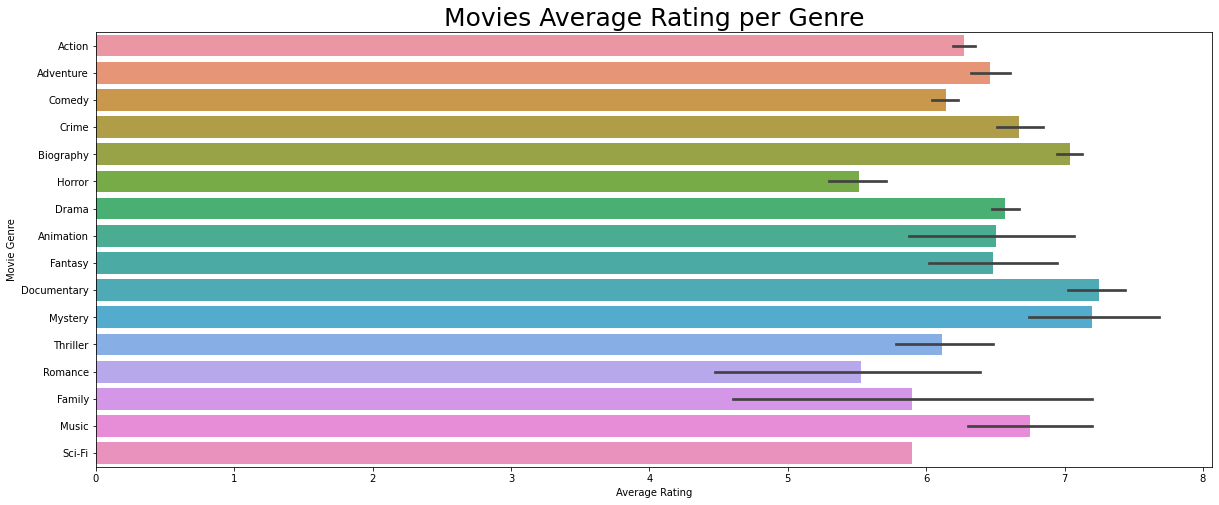

In [46]:
# genre1 vs averagerating
plt.figure(figsize=(20,8))
sns.barplot(y=microsoft_studio_df["genre1"],
            x=microsoft_studio_df["averagerating"],
            orient="h")
plt.xlabel("Average Rating")
plt.ylabel("Movie Genre")
plt.title("Movies Average Rating per Genre", size=25);

Observation: all genres had on average ratings above 5. Documentaries led with highest ratings.

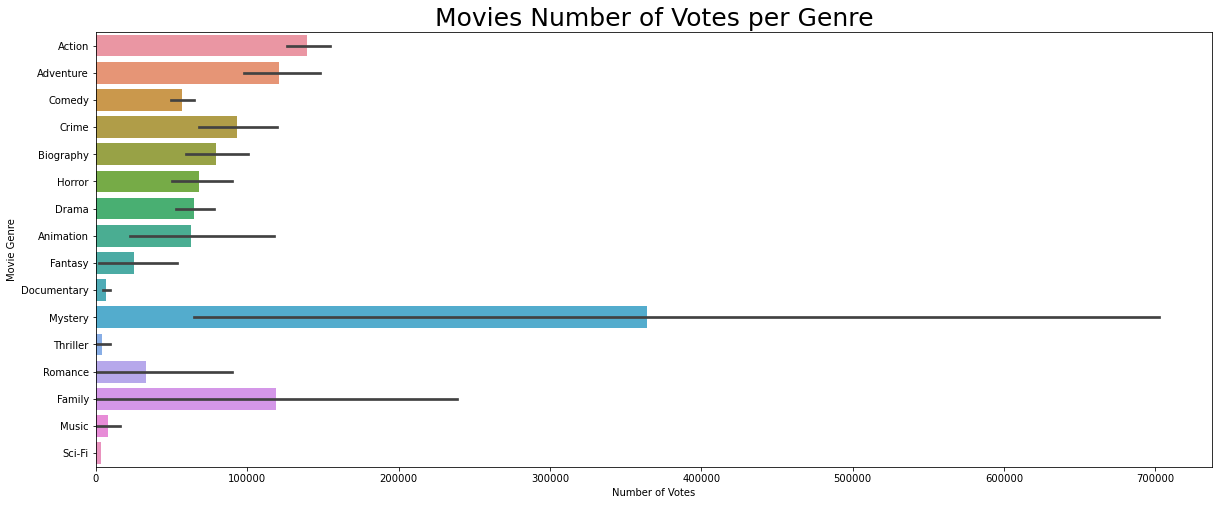

In [47]:
# genre1 vs numvotes
plt.figure(figsize=(20,8))
sns.barplot(y=microsoft_studio_df["genre1"],
            x=microsoft_studio_df["numvotes"],
            orient="h")
plt.xlabel("Number of Votes")
plt.ylabel("Movie Genre")
plt.title("Movies Number of Votes per Genre", size=25);

Observation: mystery received the highest number of votes

### 2.3.3) Ratings vs. Revenue

Correlation coefficient:  0.19657232185306417


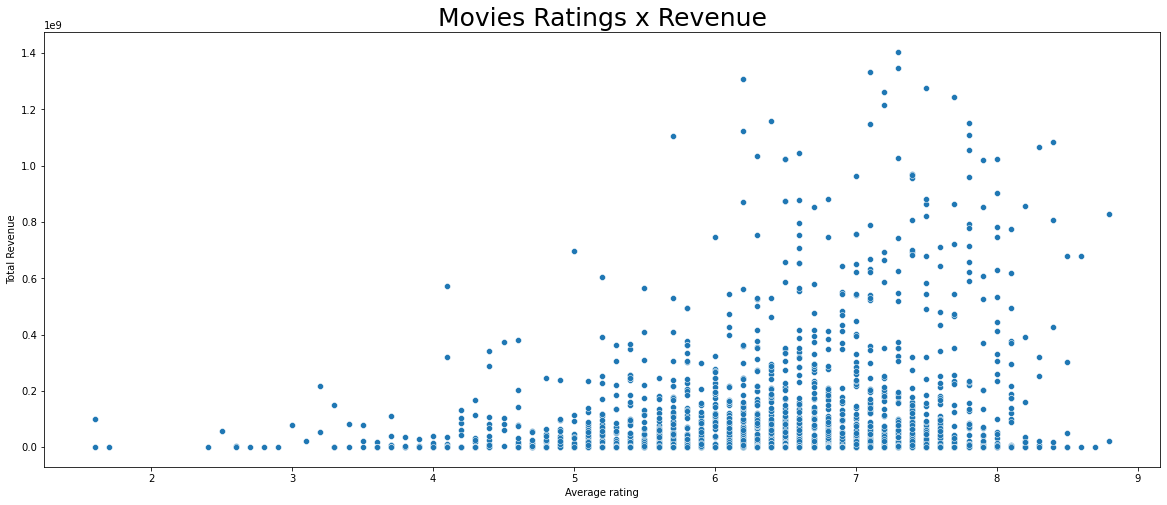

In [58]:
# averagerating v total_revenue scatter plot
plt.figure(figsize=(20,8))
sns.scatterplot(y=microsoft_studio_df["total_revenue"],
                x=microsoft_studio_df["averagerating"])
plt.title("Movies Ratings x Revenue", size=25)
plt.xlabel("Average rating")
plt.ylabel("Total Revenue");
print("Correlation coefficient: ",
                 np.corrcoef(microsoft_studio_df["total_revenue"],
                 microsoft_studio_df["averagerating"])[1,0])

Observation: There is a very weak positive correlation between ratings and revenue

### 2.3.4) Runtime vs Ratings

Correlation coefficient:  0.18003038888375397


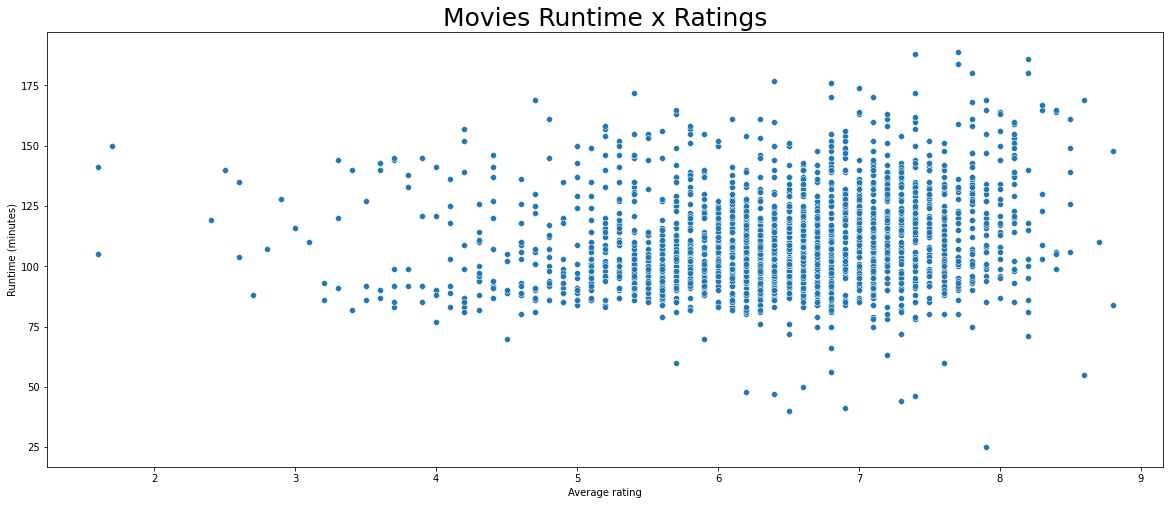

In [59]:
# averagerating v total_revenue scatter plot
plt.figure(figsize=(20,8))
sns.scatterplot(y=microsoft_studio_df["runtime_minutes"],
                x=microsoft_studio_df["averagerating"])
plt.title("Movies Runtime x Ratings", size=25)
plt.xlabel("Average rating")
plt.ylabel("Runtime (minutes)");
print("Correlation coefficient: ",
                 np.corrcoef(microsoft_studio_df["runtime_minutes"],
                 microsoft_studio_df["averagerating"])[1,0])

Observation: there is a very weak positive correlation between runtime and ratings

### 2.3.5) Runtime vs Revenue

Correlation coefficient:  0.1653529686677126


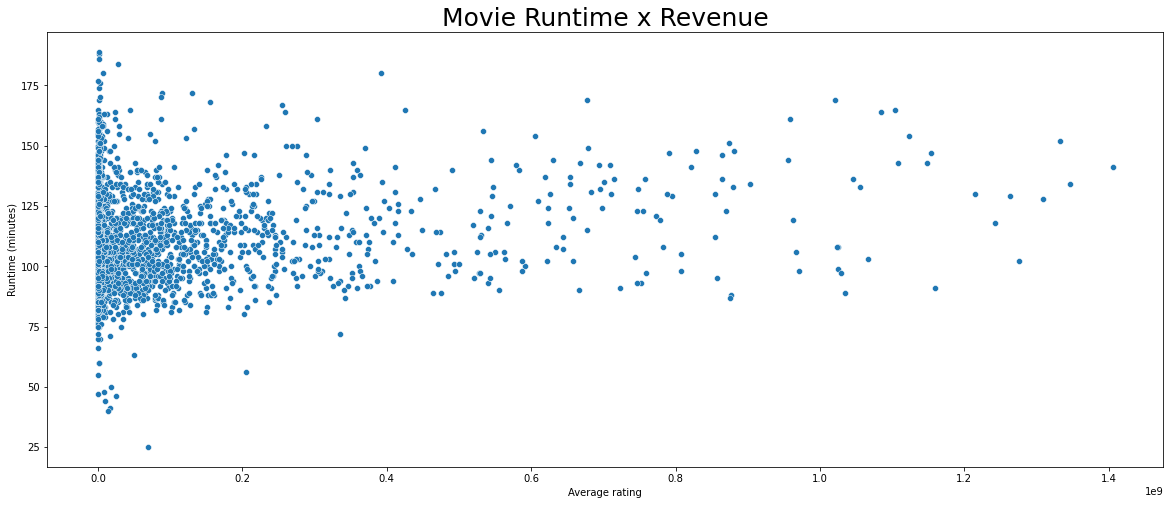

In [60]:
# averagerating v total_revenue scatter plot
plt.figure(figsize=(20,8))
sns.scatterplot(y=microsoft_studio_df["runtime_minutes"],
                x=microsoft_studio_df["total_revenue"])
plt.title("Movie Runtime x Revenue", size=25)
plt.xlabel("Average rating")
plt.ylabel("Runtime (minutes)");
print("Correlation coefficient: ",
                 np.corrcoef(microsoft_studio_df["runtime_minutes"],
                 microsoft_studio_df["total_revenue"])[1,0])

Observation: there is a very weak positive correlation between movie runtime and revenue.

### 2.3.6) Studios Analysis

<Figure size 720x432 with 0 Axes>

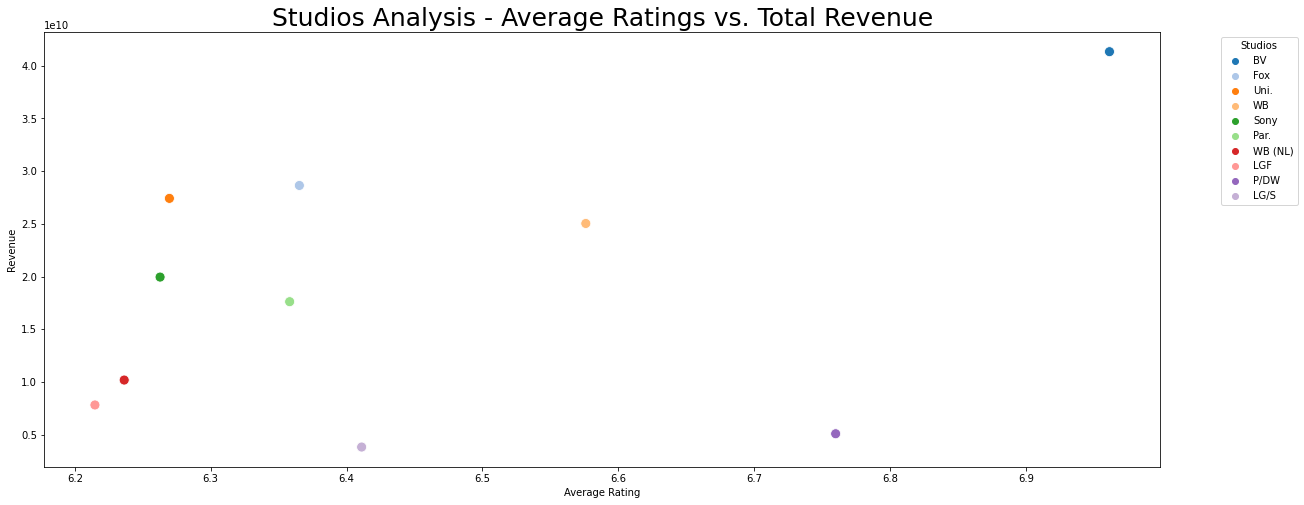

In [69]:
# studio vs total_revenue vs averagerating
plt.figure(figsize=(10,6))
studio_performance = microsoft_studio_df.groupby('studio').agg({
    'averagerating': 'mean',
    'total_revenue': 'sum'
}).reset_index()
studio_performance = studio_performance.sort_values(by='total_revenue', ascending=False)
top_n_studios = 10
top_studios = studio_performance.head(top_n_studios)
plt.figure(figsize=(20,8))
sns.scatterplot(x='averagerating',
               y='total_revenue', 
               data=top_studios,
               hue='studio', 
               palette='tab20', s=100)
plt.xlabel('Average Rating')
plt.ylabel('Revenue')
plt.title('Top 10 Studios Analysis - Average Ratings vs. Total Revenue', size = 25)
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[0:top_n_studios], labels[0:top_n_studios],
bbox_to_anchor=(1.05, 1), loc='upper left', title='Studios');

Observation: the top studio by revenue is BV and it has both revenue and ratings high. The second one fox has slightly lower ratings beaten by P/DW, which has relatively lower earnings.

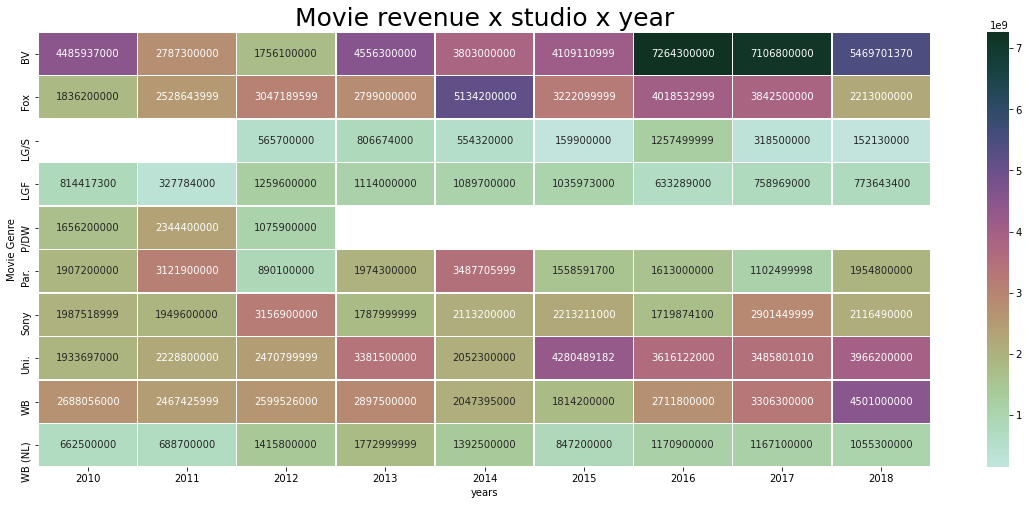

In [85]:
# studio vs total_revenue vs year
studio_revenue_by_year = microsoft_studio_df.groupby(['start_year', 
                        'studio'])['total_revenue'].sum()\
                        .reset_index()
top_n_studios = 10
top_studios = studio_revenue_by_year.groupby('studio')\
             ['total_revenue'].sum().nlargest(top_n_studios).index
top_studio_revenue_by_year = studio_revenue_by_year\
                [studio_revenue_by_year['studio'].isin(top_studios)]
heatmap_data = top_studio_revenue_by_year.pivot('studio', 
               'start_year', 'total_revenue')
cmap = sns.cubehelix_palette(start=1.5, rot=1.5, as_cmap=True)
plt.figure(figsize=(20,8))
sns.heatmap(heatmap_data, 
            cmap= cmap,
            annot=True, 
            fmt='.0f', 
            linewidths=0.5)
plt.xlabel("years")
plt.ylabel("Movie Genre")
plt.title("Movie revenue x studio x year", size=25);

Observatio: BV made high revenues in 2016 and 2017. But they generally made high revenues accross the years.

### 2.3.7) Revenue Breakdown

<ipython-input-91-4db435896fde>:16: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout();


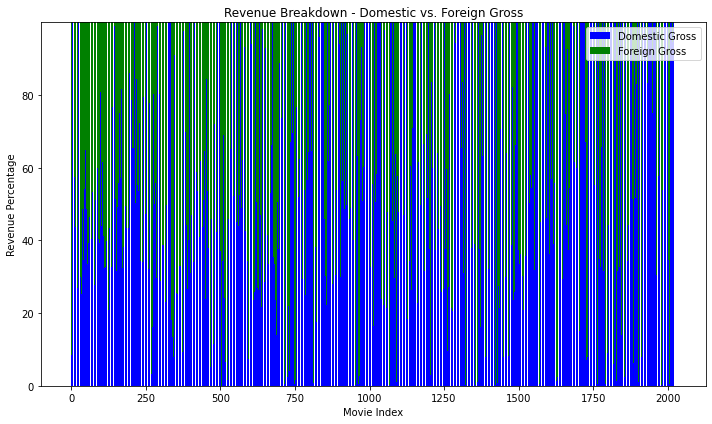

In [91]:
# Revenue breakdown between domestic and foreign
microsoft_studio_df['domestic_percentage'] = microsoft_studio_df['domestic_gross'] / \
                    microsoft_studio_df['total_revenue'] * 100
microsoft_studio_df['foreign_percentage'] = microsoft_studio_df['foreign_gross'] / \
                    microsoft_studio_df['total_revenue'] * 100
plt.figure(figsize=(10, 6))
plt.bar(microsoft_studio_df.index, microsoft_studio_df['domestic_percentage'],
         label='Domestic Gross', color='b')
plt.bar(microsoft_studio_df.index, microsoft_studio_df['foreign_percentage'], 
         bottom=microsoft_studio_df['domestic_percentage'], label='Foreign Gross', color='g')

plt.xlabel('Movie Index')
plt.ylabel('Revenue Percentage')
plt.title('Revenue Breakdown - Domestic vs. Foreign Gross')
plt.legend()
plt.tight_layout();


### 2.3.8) Top Movies

## 2.4) Conclusions

## 2.5) Recommendations